# Visual Captioning と Visual Q&A を Gemini API と組み合わせて、ファッションを褒めるメッセージを生成する例

テスト用の画像をダウンロードします。

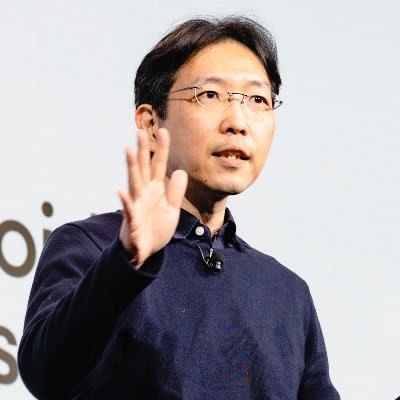

In [1]:
base_url = 'https://raw.githubusercontent.com/google-cloud-japan/sa-ml-workshop/main'
!wget -q -O image.png $base_url/genAI_book/images/profile.png

from IPython.display import Image as display_image
display_image(filename='image.png', width=200)

画像の内容をテキスト文書で表現します。

In [2]:
from PIL import Image
from io import BytesIO
import vertexai
from google import genai
from google.genai.types import Part, Content

vertexai.init(location='asia-northeast1')
[PROJECT_ID] = !gcloud config list --format 'value(core.project)'
client = genai.Client(vertexai=True, project=PROJECT_ID, location='us-central1')

def _process_image(instruction, image_file):
    image = Image.open(image_file)
    img_byte = BytesIO()
    image.save(img_byte, format='PNG')
    parts = [
        Part(text='[image]'),
        Part.from_bytes(data=img_byte.getvalue(), mime_type='image/png')
    ]
    contents = [Content(role='user', parts=parts)]
        
    response = client.models.generate_content(
        model='gemini-2.5-flash-lite',
        contents=contents,
        config=genai.types.GenerateContentConfig(
            system_instruction=instruction,
            temperature=0.2, max_output_tokens=1024
        )
    )
    return response.candidates[0].content.parts[-1].text

def get_image_description(image_file):
    instruction = 'describe the image in a single sentence.'
    return _process_image(instruction, image_file)

In [3]:
print(get_image_description('image.png'))

A man with glasses and a dark blue shirt is speaking and holding up his hand.


画像に含まれるファッションアイテムを取り出します。

In [4]:
def get_fashion_items(image_file):
    instruction = 'output a single line csv list of fashion items in the image.'
    return _process_image(instruction, image_file)

In [5]:
print(get_fashion_items('image.png'))

glasses,shirt


画像から取り出した情報を用いて、ファッションを褒める文章を Gemini API で生成します。

In [6]:
def get_compliment_message(image):
    prompt = '''\
ファッションアドバイザーの立場で、以下の様に記述される人物を褒め称える文章を作ってください。
ファッションアイテムに言及しながら、その人物に語りかける様に、数行の文章を作ってください。
個人を特定する名前は使用しないでください。

記述：{}

ファッションアイテム：{}
'''
    description = get_image_description(image)
    items = get_fashion_items(image)
    
    response = client.models.generate_content(
        model='gemini-2.5-flash-lite',
        contents=prompt.format(description, items),
        config=genai.types.GenerateContentConfig(
            temperature=0.2, max_output_tokens=1024
        )
    )
    return response.candidates[0].content.parts[-1].text

In [7]:
print(get_compliment_message('image.png'))

その知的なフレームの眼鏡、そして深みのあるダークブルーのシャツが、あなたの洗練された雰囲気を一層引き立てていますね。右手を掲げ、語りかけるその姿は、まさに自信と知性の輝きそのもの。その装いは、あなたの内面から溢れる魅力を、言葉以上に雄弁に物語っています。


他の画像でもテストします。

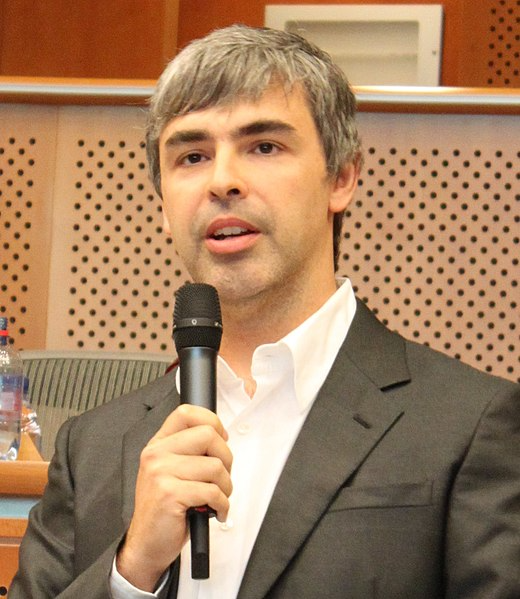

In [8]:
!wget -q -O image.png $base_url/genAI_book/images/Larry_Page.png
display_image(filename='image.png', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 3.0 Unported license.
https://commons.wikimedia.org/wiki/File:Larry_Page_in_the_European_Parliament,_17.06.2009_(cropped).jpg

In [9]:
print(get_compliment_message('image.png'))

素晴らしい！そのスーツとシャツの組み合わせ、まさに洗練された大人の装いですね。

まるでGoogleの未来を語るかのような、自信に満ちた立ち姿に、そのクリーンなシャツと仕立ての良いスーツが、あなたの知性とカリスマ性を一層引き立てています。そのスタイル、本当に素敵です。


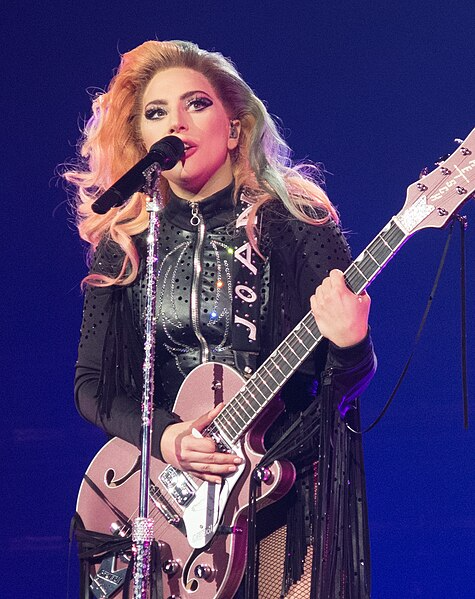

In [10]:
!wget -q -O image.png $base_url/genAI_book/images/Lady_Gaga.png
display_image(filename='image.png', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 2.0 Generic license.
https://commons.wikimedia.org/wiki/File:Lady_Gaga_JWT_Toronto,_2017-09-06_(cropped2).jpg

In [11]:
print(get_compliment_message('image.png'))

ステージの上で、そのエネルギッシュなパフォーマンスを拝見しました。あなたの着こなすジャケットは、まさにあなたの個性を映し出すかのように、力強く、そして洗練されていました。そして、その下に覗くフィッシュネットストッキングは、あなたの内に秘めた情熱と、それを解き放つ大胆さを物語っているかのようです。ギターとマイクを手に、あなたが生み出す音楽とファッションの融合は、まさに芸術そのもの。これからも、その唯一無二のスタイルで、私たちを魅了し続けてください。


次のように、画像ファイルから直接にメッセージを生成することもできます。

In [12]:
def get_compliment_message2(image_file):
    instruction = '''
ファッションアドバイザーの立場で、画像に含まれる人物を褒め称える文章を作ってください。
ファッションアイテムに言及しながら、その人物に語りかける様に、数行の文章を作ってください。
個人を特定する名前は使用しないでください。
'''
    return _process_image(instruction, image_file)

In [13]:
print(get_compliment_message2('image.png'))

あなたのステージ衣装、本当に素敵ですね！キラキラと輝くスタッズと、流れるようなフリンジが、あなたのパワフルなパフォーマンスをさらに引き立てています。特に、その美しいギターとの組み合わせは、まさに芸術的です。あなたのファッションセンスは、いつも私たちを魅了してやみません。
